In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [3]:
data = pd.read_csv("../Downloads/archive/winequality-red.csv")  # Cambia el path si es necesario


In [5]:
data.info()       
data.describe()    
data.head()        


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


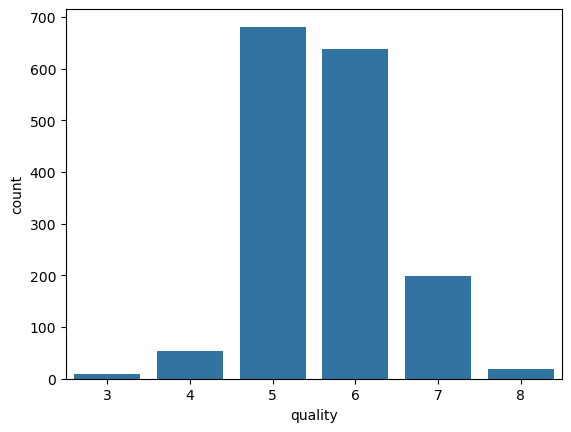

In [7]:
sns.countplot(x='quality', data=data)
plt.show()


In [10]:
data.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

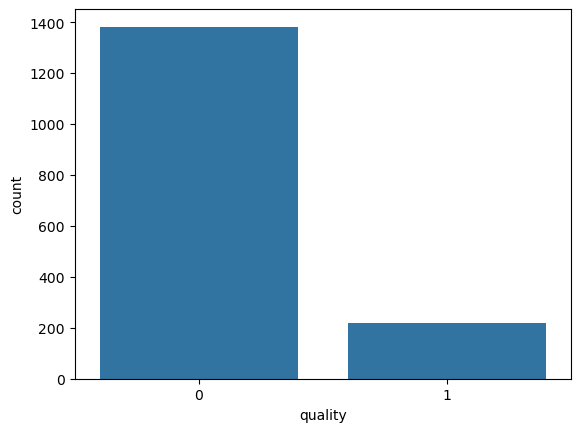

In [12]:
data['quality'] = data['quality'].apply(lambda x: 1 if x >= 7 else 0)
sns.countplot(x='quality', data=data)
plt.show()


In [14]:
X = data.drop('quality', axis=1)
y = data['quality']


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
param_grid = {'max_depth': [3, 5, 7, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [20]:
best_tree = grid_search.best_estimator_


In [22]:
y_pred = best_tree.predict(X_test)


In [24]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.859375
Confusion Matrix:
 [[264   9]
 [ 36  11]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       273
           1       0.55      0.23      0.33        47

    accuracy                           0.86       320
   macro avg       0.72      0.60      0.62       320
weighted avg       0.83      0.86      0.83       320



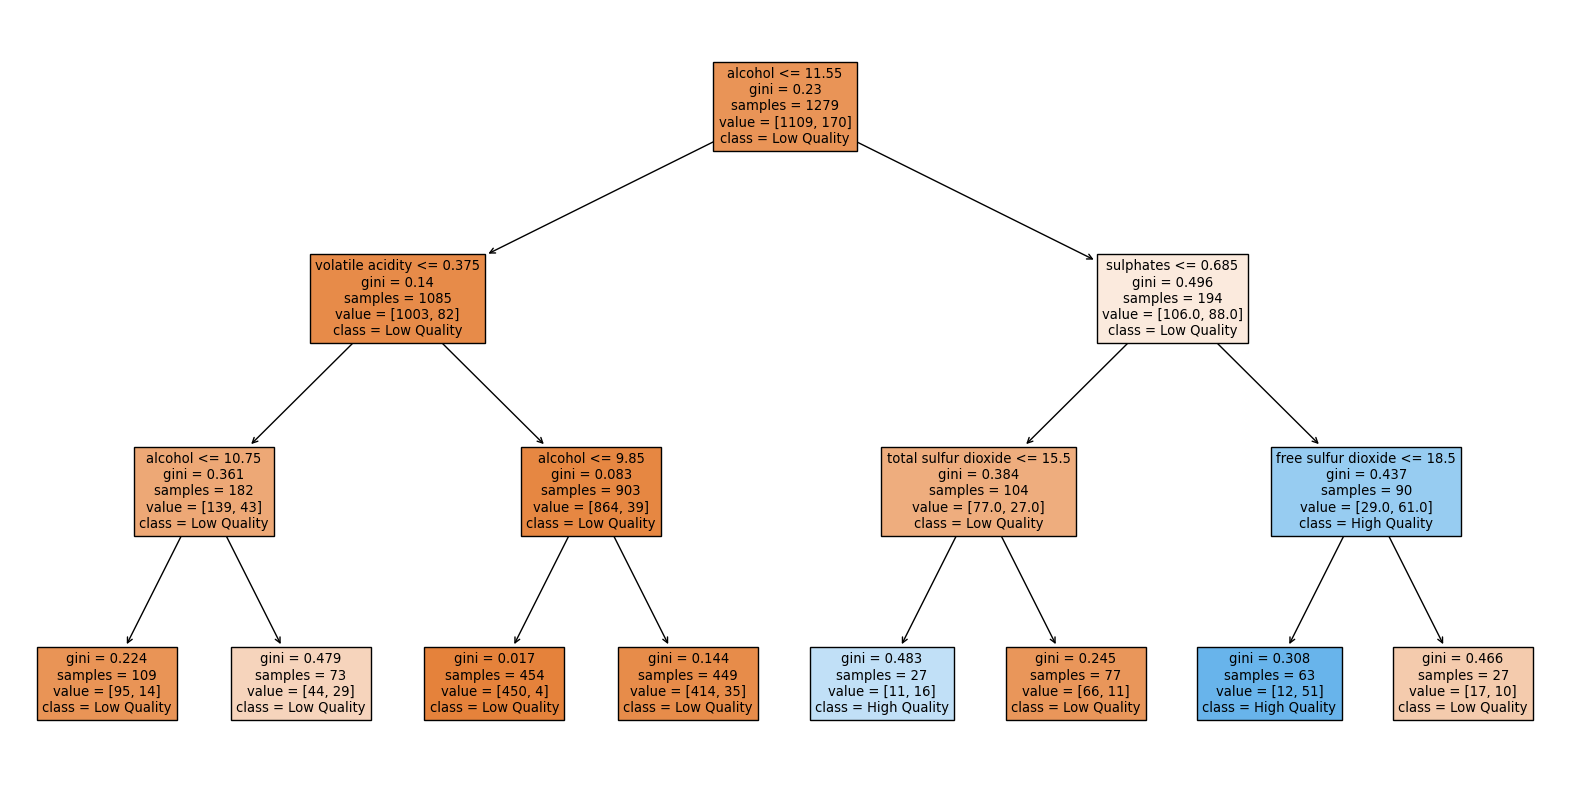

In [26]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(best_tree, filled=True, feature_names=X.columns, class_names=['Low Quality', 'High Quality'])
plt.show()


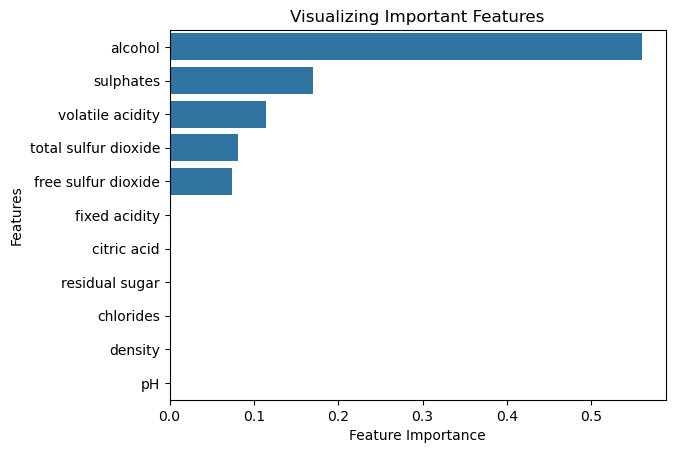

In [28]:
feature_importance = pd.Series(best_tree.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()


In [36]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

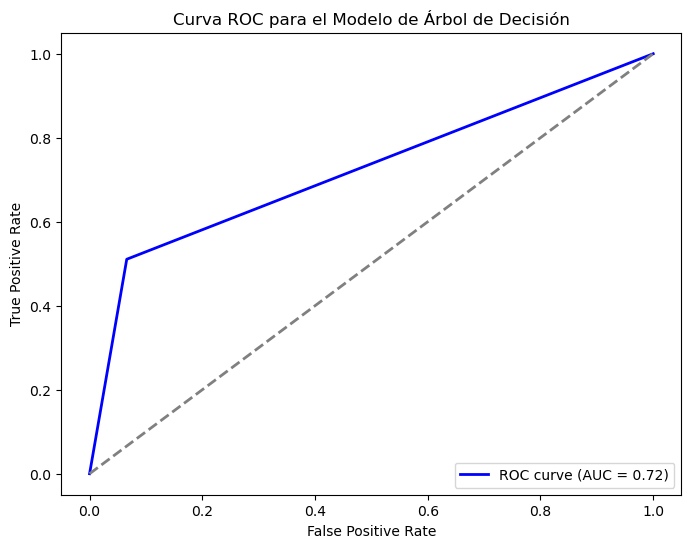

In [38]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_proba = tree.predict_proba(X_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC para el Modelo de Árbol de Decisión")
plt.legend(loc="lower right")
plt.show()


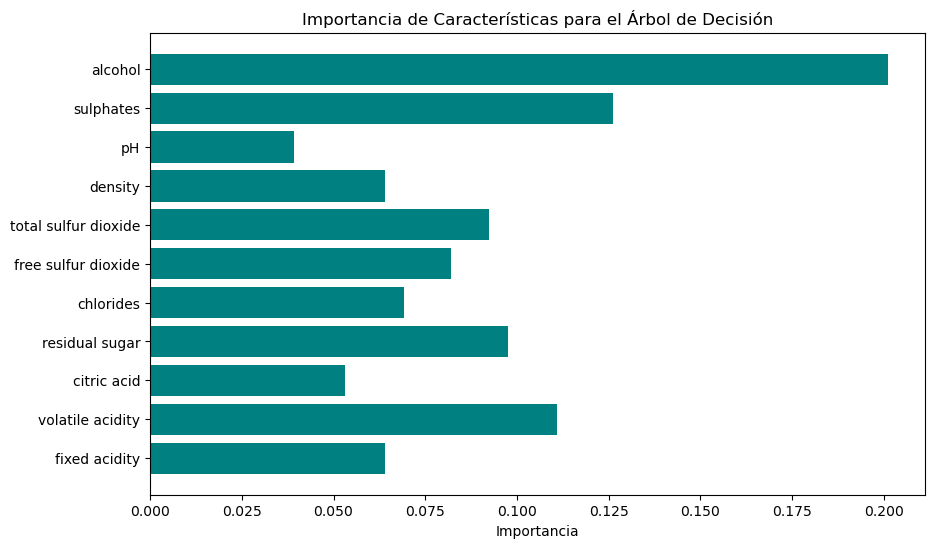

In [40]:
feature_importances = tree.feature_importances_
feature_names = X.columns  

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color="teal")
plt.xlabel("Importancia")
plt.title("Importancia de Características para el Árbol de Decisión")
plt.show()


In [ ]:
Interpretaciones:

Matriz de Confusión:

La matriz de confusión muestra que el modelo predijo correctamente 264 observaciones de clase 0 (calidad baja) y 9 de clase 1 (calidad alta). 
Sin embargo, tuvo 36 falsos negativos, prediciendo calidad baja cuando en realidad era alta. El modelo tiene un buen rendimiento en la clase
mayoritaria (calidad baja), pero su precisión disminuye en la clase minoritaria (calidad alta).

Reporte de Clasificación:

Precisión: El modelo tiene una precisión del 88% para la clase 0 y del 55% para la clase 1.
Recall: El modelo detecta el 97% de los casos de calidad baja, pero solo el 23% de los casos de calidad alta.
F1-Score: La puntuación F1 para la clase de calidad baja es alta (0.92), mientras que para la clase de calidad alta es moderada (0.33), debido
a la baja cantidad de casos de calidad alta en el dataset. La precisión es alta en la clase mayoritaria (calidad baja), mientras que para la
clase alta sufre debido al desbalance en las clases.

Accuracy:

La exactitud del modelo es aproximadamente del 86%, lo que indica un buen rendimiento general, aunque sesgado hacia la clase mayoritaria.
Este resultado sugiere que el modelo es confiable en general, pero que mejorar la precisión de la clase de calidad alta podría requerir
un ajuste de hiperparámetros más preciso o técnicas de balanceo de clases.

Curva ROC

La curva ROC de este modelo muestra un AUC de 0.72, lo cual indica que el modelo tiene una buena capacidad para distinguir entre las clases
de calidad alta y baja del vino. Sin embargo, el modelo podría beneficiarse de mejoras adicionales para acercarse al valor ideal de 1.

Importancia de Caracteristicas

La gráfica de importancia de características indica que las variables alcohol y sulfatos(sulphates) son las más importantes en la predicción
de la calidad del vino. Esto sugiere que estos atributos influyen significativamente en la clasificación de la calidad, lo cual es
consistente con el conocimiento experto en enología.